# celldetect


In [1]:
#source /export/CIAOT/ciaot_install/20180306/ciao-4.10/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## Getting started

In [2]:
/bin/rm -rf 2254,1522
download_chandra_obsid 2254,1522 --exclude=vvref,osol,eph1


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      229 Mb  ####################            3 s  93574.1 kb/s
  evt2     fits       23 Mb  ####################          < 1 s  90253.6 kb/s
  asol     fits       20 Mb  ####################          < 1 s  88171.3 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  51372.6 kb/s
  stat     fits        3 Mb  ####################          < 1 s  51881.0 kb/s
  aqual    fits        1 Mb  ####################          < 1 s  32417.4 kb/s
  bias     fits      494 Kb  ####################          < 1 s  18312.6 kb/s
  bias     fits      433 Kb  ####################          < 1 s  18280.0 kb/s
  bias     fits      431 Kb  ####################          < 1 s  20481.4 kb/s
  bias     fits      430 Kb  ####################          < 1 s  19845.0 kb/s
  bias     fits      429 Kb  ####################    

In [3]:
chandra_repro 2254 out=`pwd`
chandra_repro 1522 out=`pwd`


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/celldetect/2254'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/celldetect/acisf02254_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/celldetect/acisf02254_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with the new prod

In [4]:
fluximage "acisf02254_repro_evt2.fits[ccd_id=0:3]" binsize=1 bands=broad outroot=s3 clob+

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf02254_000N001_asol1.fits found.
Bad-pixel file acisf02254_repro_bpix1.fits found.
Mask file acisf02254_000N004_msk1.fits found.

The output images will have 2733 by 2735 pixels, pixel size of 0.492 arcsec,
    and cover x=2787.5:5520.5:1,y=2761.5:5496.5:1.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 2254
Creating 4 instrument maps for obsid 2254
Creating 4 exposure maps for obsid 2254
Combining 4 exposure maps for obsid 2254
Thresholding data for obsid 2254
Exposure-correcting image for obsid 2254

The following files were created:

 The clipped counts image is:
     s3_broad_thresh.img

 The clipped exposure map is:
     s3_broad_thresh.expmap

 The exposure-corrected image is:
     s3_broad_flux.img



## Run celldetect

### Simple exmample, no expmap

In [5]:
mkpsfmap s3_broad_thresh.img s3_broad.psfmap energy=1.4967 ecf=0.8 clob+

In [6]:
punlearn celldetect
pset celldetect infile=s3_broad_thresh.img
pset celldetect outfile=s3_src.fits
pset celldetect regfile=s3_src.reg
pset celldetect psffile=s3_broad.psfmap 
celldetect mode=h clob+

[1] 3301
[1]+  Done                    ds9 s3_broad_thresh.img -region s3_src.fits -log -zoom to fit -saveimage png cell1.png


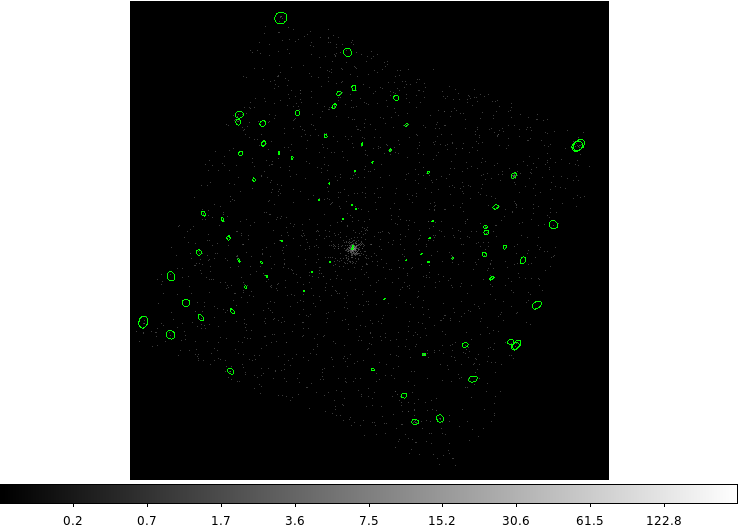

In [7]:
ds9 s3_broad_thresh.img -region s3_src.fits -log -zoom to fit -saveimage png cell1.png  &
sleep 10
xpaset -p ds9 quit

display < cell1.png

### With expmap

In [8]:
punlearn celldetect
pset celldetect infile=s3_broad_thresh.img
pset celldetect outfile=s3_expmap_src.fits
pset celldetect regfile=s3_expmap_src.reg
pset celldetect expstk=s3_broad_thresh.expmap
pset celldetect expratio=0.9
pset celldetect psffile=s3_broad.psfmap 
celldetect mode=h clob+

[1] 3368
[1]+  Done                    ds9 s3_broad_thresh.img -region s3_expmap_src.fits -log -zoom to fit -saveimage png cell2.png


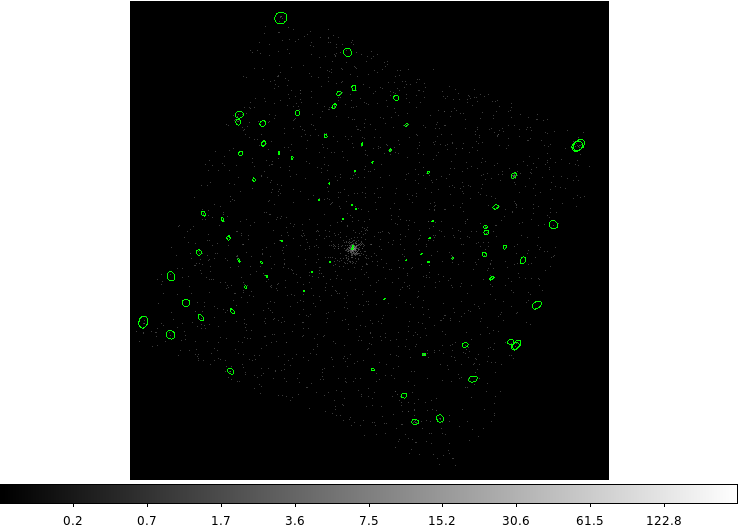

In [9]:
ds9 s3_broad_thresh.img -region s3_expmap_src.fits -log -zoom to fit -saveimage png cell2.png  &
sleep 10
xpaset -p ds9 quit
display < cell2.png

## Recursive Blocking


In [10]:
dmkeypar acisf01522_repro_evt2.fits DETNAM echo+

ACIS-012367


In [11]:
punlearn celldetect
pset celldetect infile="acisf01522_repro_evt2.fits[ccd_id=0:3,energy=500:7000]"
pset celldetect outfile=acisi_block_src.fits
pset celldetect regfile=acisi_block_src.reg
pset celldetect fixedcell=12
celldetect mode=h clob+ maxlogical=2048

[1] 3454
[1]+  Done                    ds9 acisf01522_repro_evt2.fits"[events,energy=500:7000]" -log -region acisi_block_src.fits -bin factor 4 -scale limits 0 100 -saveimage png cell3.png


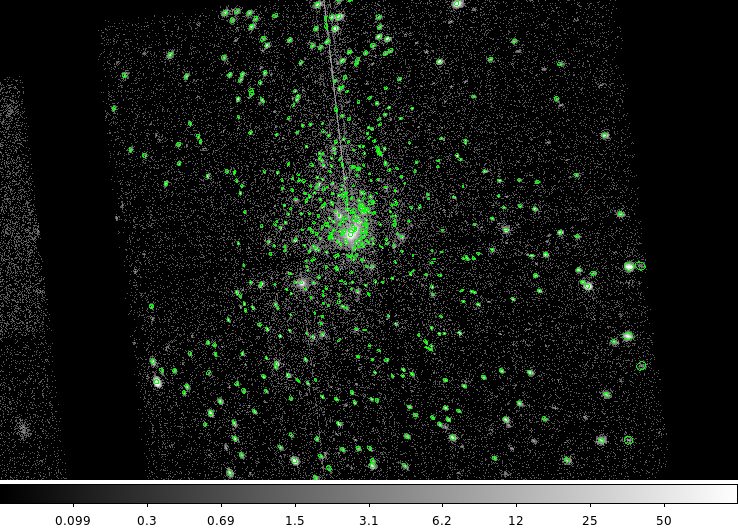

In [12]:
ds9 acisf01522_repro_evt2.fits"[events,energy=500:7000]" -log \
  -region acisi_block_src.fits -bin factor 4 -scale limits 0 100 \
  -saveimage png cell3.png  &
sleep 10
xpaset -p ds9 quit
display < cell3.png

In [13]:
dmlist "acisi_block_src.fits[block=1]" counts

560     


In [14]:
dmlist "acisi_block_src.fits[block=2]" counts

8       


In [15]:
dmlist "acisi_block_src.fits[block=4]" counts

0       


## With exposure maps

In [16]:
plist celldetect


Parameters for /proj/sds/Staff/kjg/Threads/celldetect/param/celldetect.par

#
#   celldetect parameter file
#
#
#   input  
#
        infile = acisf01522_repro_evt2.fits[ccd_id=0:3,energy=500:7000] Input file
#
#   output
#
       outfile = acisi_block_src.fits Output source list
      (psffile = )                single psf file or list of psf files
       (expstk = )                list of exposure map files
      (regfile = acisi_block_src.reg) ASCII regions file
#
#   output options
#
      (clobber = no)              Overwrite exiting outputs?
#
#   output content/format options
#
       (thresh = 3)               Source threshold
(snr_diminution = 1.0)             Diminution on SNR threshold - range (< 0 to 1) - Allows fine grained cell sliding
    (findpeaks = yes)             Find local peaks?
     (centroid = yes)             Compute source centroids?
     (ellsigma = 3)               Size of output source ellipses (in sigmas)
     (expratio = 0)               cutoff ratio for

In [17]:
echo 4096.5 - 1024 | bc -l
echo 4096.5 + 1024 | bc -l

3072.5
5120.5


In [18]:
fluximage acisf01522_repro_evt2.fits"[ccd_id=0:3]" \
  out=bin1 xygrid=3072.5:5120.5:1,3072.5:5120.5:1 mode=h clob+ band=broad

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf01522_002N001_asol1.fits found.
Bad-pixel file acisf01522_repro_bpix1.fits found.
Mask file acisf01522_002N005_msk1.fits found.

The output images will have 2048 by 2048 pixels,
    and cover x=3072.5:5120.5:1,y=3072.5:5120.5:1.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 1522
Creating 4 instrument maps for obsid 1522
Creating 4 exposure maps for obsid 1522
Combining 4 exposure maps for obsid 1522
Thresholding data for obsid 1522
Exposure-correcting image for obsid 1522

The following files were created:

 The clipped counts image is:
     bin1_broad_thresh.img

 The clipped exposure map is:
     bin1_broad_thresh.expmap

 The exposure-corrected image is:
     bin1_broad_flux.img



In [19]:
echo 4096.5 - 2048 | bc -l
echo 4096.5 + 2048 | bc -l

2048.5
6144.5


In [20]:
fluximage acisf01522_repro_evt2.fits"[ccd_id=0:3]" \
  out=bin2 xygrid=2048.5:6144.5:2,2048.5:6144.5:2 mode=h clob+ band=broad

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf01522_002N001_asol1.fits found.
Bad-pixel file acisf01522_repro_bpix1.fits found.
Mask file acisf01522_002N005_msk1.fits found.

The output images will have 2048 by 2048 pixels,
    and cover x=2048.5:6144.5:2,y=2048.5:6144.5:2.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 1522
Creating 4 instrument maps for obsid 1522
Creating 4 exposure maps for obsid 1522
Combining 4 exposure maps for obsid 1522
Thresholding data for obsid 1522
Exposure-correcting image for obsid 1522

The following files were created:

 The clipped counts image is:
     bin2_broad_thresh.img

 The clipped exposure map is:
     bin2_broad_thresh.expmap

 The exposure-corrected image is:
     bin2_broad_flux.img



In [21]:
fluximage acisf01522_repro_evt2.fits"[ccd_id=0:3]" \
  out=bin4 xygrid=0.5:8192.5:4,0.5:8192.5:4 mode=h clob+ band=broad

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf01522_002N001_asol1.fits found.
Bad-pixel file acisf01522_repro_bpix1.fits found.
Mask file acisf01522_002N005_msk1.fits found.

The output images will have 2048 by 2048 pixels,
    and cover x=0.5:8192.5:4,y=0.5:8192.5:4.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 1522
Creating 4 instrument maps for obsid 1522
Creating 4 exposure maps for obsid 1522
Combining 4 exposure maps for obsid 1522
Thresholding data for obsid 1522
Exposure-correcting image for obsid 1522

The following files were created:

 The clipped counts image is:
     bin4_broad_thresh.img

 The clipped exposure map is:
     bin4_broad_thresh.expmap

 The exposure-corrected image is:
     bin4_broad_flux.img



In [22]:
/bin/ls bin?_broad_thresh.expmap | sort > expmap.lis
cat expmap.lis

bin1_broad_thresh.expmap
bin2_broad_thresh.expmap
bin4_broad_thresh.expmap


In [23]:
mkpsfmap bin1_broad_thresh.expmap bin1_broad.psfmap energy=1.4967 ecf=0.8 clob+
mkpsfmap bin2_broad_thresh.expmap bin2_broad.psfmap energy=1.4967 ecf=0.8 clob+
mkpsfmap bin4_broad_thresh.expmap bin4_broad.psfmap energy=1.4967 ecf=0.8 clob+

In [24]:
/bin/ls bin?_broad.psfmap | sort > psf.lis
cat psf.lis

bin1_broad.psfmap
bin2_broad.psfmap
bin4_broad.psfmap


In [25]:
punlearn celldetect
pset celldetect infile="acisf01522_repro_evt2.fits[ccd_id=0:3,energy=500:7000]"
pset celldetect outfile=acisi_block_expmap_src.fits
pset celldetect regfile=acisi_block_expmap_src.reg
pset celldetect psffile=@psf.lis
pset celldetect expstk=@expmap.lis
pset celldetect expratio=0.99
celldetect mode=h clob+ maxlogical=2048

[1] 4415
[1]+  Done                    ds9 acisf01522_repro_evt2.fits"[events,energy=500:7000]" -log -region acisi_block_src.fits -region color red -region width 3 -region acisi_block_expmap_src.fits -bin factor 4 -scale limits 0 100 -saveimage png cell4.png


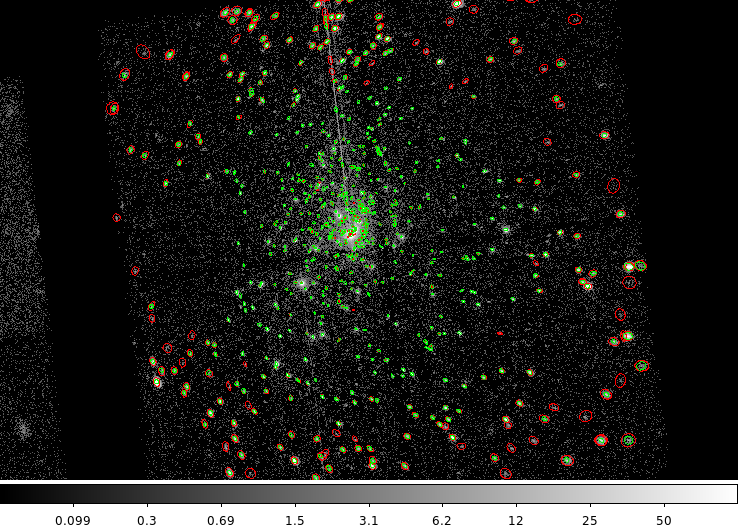

In [26]:
ds9 acisf01522_repro_evt2.fits"[events,energy=500:7000]" -log \
  -region acisi_block_src.fits \
  -region color red -region width 3 -region acisi_block_expmap_src.fits \
  -bin factor 4 -scale limits 0 100 -saveimage png cell4.png  &
sleep 10
xpaset -p ds9 quit
display < cell4.png

# Cleanup

Keep these; they are used by the `detect_output` thread.

In [27]:
/bin/rm -rf 1522 2254 acisf01522* acisf02254* *pbk0* pcadf*asol1.fits
/bin/rm -f bin*.img bin*.expmap bin*.psfmap
/bin/rm -f s3*img s3*.expmap s3*.psfmap
/bin/rm -rf param